# Case 7

## Business Problem

We want to make a basic implementation of a Meta-heuristic algorithm for optimization of simple function 

## Metaheuristic

Solution to problems of which there is little information and that cannot be solved by "brute force". But, given a possible solution, it is possible to determine how good it is. Example: Robot to shoot arrows

## Packages Import

In [1]:
import matplotlib.pyplot as plt
import random

## Function Definition

We start by defining the data or function over which we want to define the optimization algorithm

In [2]:
# Function created to be able to set a list of numbers over an specified range
def float_range(start, stop, step):
  while start < stop:
    yield float(start)
    start += decimal.Decimal(step)

We can define a function to optimize

In [3]:
# Function: f(x) = -2x^2+4x+1
def f(x):
    return (-2*x**2+4*x+1)

# Derivative of function : f'(x) = -4x + 4
def deriv_f(x):
    return (-4*x+4)



Or, as in this case, we can define a list of values on which we want to perform the optimization

In [4]:
# Explicit Data Points
values_x = []
initial_value = -1000
values_x.append(initial_value)
for value in range(200000):
    initial_value+=0.01 
    values_x.append(initial_value)
    
values_f_x = []
values_deriv_f_x = []
for value in values_x:
    values_f_x.append(f(value))
    values_deriv_f_x.append(deriv_f(value))


## Data Visualization

In order to take a better look a the function we want to optimize, we can take a look a the graph. It is clear that a global maxima can be established

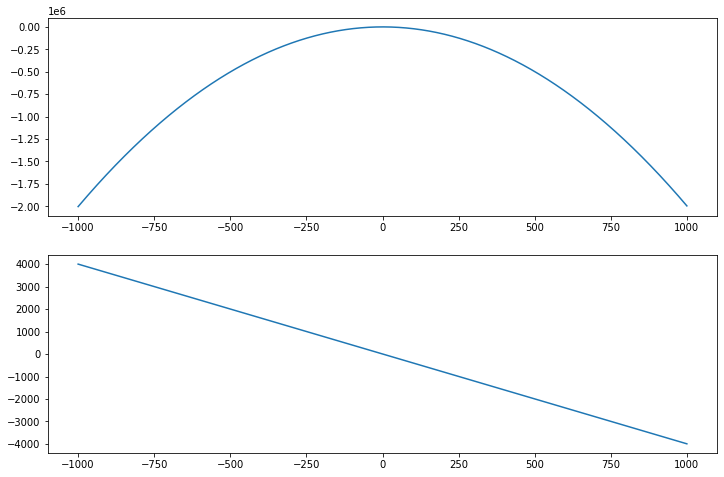

In [5]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

axarr[0].plot(values_x, values_f_x)
axarr[1].plot(values_x, values_deriv_f_x)

## Gradient Ascend

We can start with a simple optimization method based on the derivative of the function.

**Pseudocode**
1. We take an arbitrary value of x
2. We add a small part of your slope: x = x + a *f'(x) (Where 0< a < 1)
3. The movement will depend on the value of the slope
4. It is carried out until it is at the peak: the derivative would be 0 and it will not move

In [6]:
%%time
def Gradient_Ascend_1(x1,alpha, tol = 0.00001,max_iter = 10000000):
 
    for iter in range(0,max_iter):
        print('x1: ',x1)
        x2 = x1 + alpha*deriv_f(x1)
        print('x2: ',x2)
        dif = abs(abs(f(x2)) - abs(f(x1)))
        print('diff: ',dif)
        x1 = x2
        print('count: ',iter)
        if dif <= tol:
            print('Result within tolerance levels')
            break
        if iter == max_iter:
            print('Maximum number of iteration reached')
            break
        
    return x1

max_gradient_ascend = Gradient_Ascend_1(10,0.01)

x1:  10
x2:  9.64
diff:  12.700799999999987
count:  0
x1:  9.64
x2:  9.294400000000001
diff:  11.705057279999977
count:  1
x1:  9.294400000000001
x2:  8.962624000000002
diff:  10.78738078924799
count:  2
x1:  8.962624000000002
x2:  8.644119040000001
diff:  9.94165013537095
count:  3
x1:  8.644119040000001
x2:  8.3383542784
diff:  9.162224764757909
count:  4
x1:  8.3383542784
x2:  8.044820107264
diff:  8.44390634320088
count:  5
x1:  8.044820107264
x2:  7.76302730297344
diff:  7.781904085893899
count:  6
x1:  7.76302730297344
x2:  7.492506210854502
diff:  7.171802805559821
count:  7
x1:  7.492506210854502
x2:  7.232805962420322
diff:  6.60953346560396
count:  8
x1:  7.232805962420322
x2:  6.983493723923509
diff:  6.091346041900593
count:  9
x1:  6.983493723923509
x2:  6.744153974966569
diff:  5.613784512215574
count:  10
x1:  6.744153974966569
x2:  6.514387815967906
diff:  5.173663806457874
count:  11
x1:  6.514387815967906
x2:  6.293812303329189
diff:  4.768048564031595
count:  12
x1: 

But this method has a big problem: some times we do not know the objective funtion that can model our situation, or even if we had it, that function may not be differentiable

## Hill- Climbing

So, this is where the real meta-heuristics come in play. First one is Hill- Climbing

**Pseudocode**
1. We take an arbitrary value of x
2. Evaluate the quality of the solution
3. Copy the candidate solution
4. Tweak the previous solution with a slightly different random one
5. Define candidate solutions to keep and reject based on intended purpose (maximize or minimize)

As, for this example we have the explicit objetive function to optimize, we can use it. 

In [7]:
%%time
def hill_climbing_1(x1, tol = 0.00001, max_iter = 10000000):

    for iter in range(0,max_iter):
        print('x1: ',x1)
        x2 = x1 + random.uniform(-0.1,0.1)
        print('x2: ',x2)
        dif = abs(abs(f(x2)) - abs(f(x1)))
        print('diff: ',dif)
        if f(x2) > f(x1):
            x1 = x2
        print('count: ',iter)
        if dif <= tol:
            print('Result within tolerance levels')
            break
        if iter == max_iter:
            print('Maximum number of iteration reached')
            break
        
    return x1

max_hill_climbing = hill_climbing_1(10)

x1:  7.619088879418151
x2:  7.599752816917781
diff:  0.5112006984457054
count:  84
x1:  7.599752816917781
x2:  7.619809211673999
diff:  0.5302735090995014
count:  85
x1:  7.599752816917781
x2:  7.685881770817024
diff:  2.2885556178583926
count:  86
x1:  7.599752816917781
x2:  7.652452841377391
diff:  1.3967831246718703
count:  87
x1:  7.599752816917781
x2:  7.68038665074633
diff:  2.141657118111155
count:  88
x1:  7.599752816917781
x2:  7.59339797373802
diff:  0.1676808086431123
count:  89
x1:  7.59339797373802
x2:  7.639962178435617
diff:  1.2324017819256738
count:  90
x1:  7.59339797373802
x2:  7.567984452848712
diff:  0.6689541344604635
count:  91
x1:  7.567984452848712
x2:  7.559404469142712
diff:  0.22526556610603166
count:  92
x1:  7.559404469142712
x2:  7.601059710022918
diff:  1.0964046109569239
count:  93
x1:  7.559404469142712
x2:  7.474607130574324
diff:  2.2104989890510183
count:  94
x1:  7.474607130574324
x2:  7.529506157511066
diff:  1.4278263313821071
count:  95
x1:  7.4

But this same logic can be used to implement a script that runs over the list of values taken by the function.

In [8]:
%%time
def hill_climbing_2(list_of_X_values, list_of_Y_values , tol = 0.001, max_iter = 10000000):
    

    lenght_of_list = len(list_of_X_values)-1
    index_solution = round(random.uniform(0,lenght_of_list))

    for iter in range(0,max_iter):
        f_x1 = list_of_Y_values[index_solution]
        x1 = list_of_X_values[index_solution]
        print('x1: ',x1)

        number_to_increase = 1
        increase = round(random.uniform(-5,5))
        if increase != 0:
            number_to_increase = increase

        new_index =  index_solution + number_to_increase

        if new_index > lenght_of_list:
            new_index = lenght_of_list
        
        x2 = list_of_X_values[new_index]
        f_x2 = list_of_Y_values[new_index]

        print('x2: ',x2)
        dif = abs(abs(f_x2) - abs(f_x1))
        print('diff: ',dif)
        if f_x2 > f_x1:
            index_solution = new_index
    
        print('count: ',iter)
        if dif <= tol:
            print('Result within tolerance levels')
            break
        if iter == max_iter:
            print('Maximum number of iteration reached')
            break
        
    return x1

max_hill_climbing = hill_climbing_2(values_x,values_f_x)

x1:  4.389999999235451
x2:  4.359999999235452
diff:  0.40499999990824875
count:  28487
x1:  4.359999999235452
x2:  4.399999999235451
diff:  0.5407999998776631
count:  28488
x1:  4.359999999235452
x2:  4.369999999235452
diff:  0.13459999996941718
count:  28489
x1:  4.359999999235452
x2:  4.369999999235452
diff:  0.13459999996941718
count:  28490
x1:  4.359999999235452
x2:  4.369999999235452
diff:  0.13459999996941718
count:  28491
x1:  4.359999999235452
x2:  4.389999999235451
diff:  0.40499999990824875
count:  28492
x1:  4.359999999235452
x2:  4.3799999992354515
diff:  0.26959999993883343
count:  28493
x1:  4.359999999235452
x2:  4.309999999235453
diff:  0.6669999998470715
count:  28494
x1:  4.309999999235453
x2:  4.349999999235452
diff:  0.5327999998776605
count:  28495
x1:  4.309999999235453
x2:  4.279999999235454
diff:  0.3953999999082498
count:  28496
x1:  4.279999999235454
x2:  4.2399999992354545
diff:  0.5215999998776581
count:  28497
x1:  4.2399999992354545
x2:  4.219999999235455

## Meta-heuristic through POO

As the problem gets lager and more complex it, more flexible ways to solve it are necessary in order to solve it correctly. This is why meta-heuristic problem are ussually implemented through the use of Object Oriented Programming

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c3e4079d-b65d-4f98-a9c4-e84568c199f2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>